<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2019/20</h2>
<h2>Daniela Paolotti & Michele Tizzoni</h2>
<h3>Community detection in networks</h3>
<hr>
</center>

<center>
<hr>
<h1>Final Exercise</h1>
<hr>
</center>

<ol>
<li><h4>Write a Python function implementing the Girvan-Newman algorithm to find the community structure of a graph (see: https://arxiv.org/abs/cond-mat/0112110)</h4>
    
<li><h4>Test your function on the famous Zachary Karate Club network.</h4>
    
<li><h4>Display the network with color-coded nodes according to the communities found by the algorithm</h4>
</ol>

In [1]:
%pylab inline


Bad key "axes.titlelocation" on line 298 in
/Users/Michele/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx

In [3]:
import networkx.algorithms.centrality as nc

In [4]:
from operator import itemgetter

## The Karate Club is so important that NetworkX has a function to import it

In [5]:
G=nx.karate_club_graph()

In [6]:
eNum = G.number_of_edges()
nnodes=len(G)

In [7]:
eNum, nnodes

(78, 34)

In [8]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

Note that the nodes are labelled from 0 to 33 while the most common labeling (as shown in Girvan 2002) starts from 1.

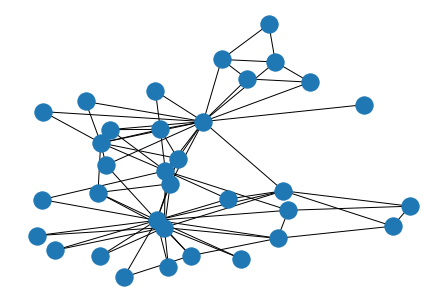

In [9]:
pos = nx.spring_layout(G)
nx.draw(G, pos)

In [10]:
nx.number_connected_components(G)

1

## First clustering function

In [11]:
def updateGraph1(G):
    
    ebw = nc.edge_betweenness(G)
    maxs = 0
    
    for k, v in ebw.items():
        if maxs < v:
            medge, maxs = k, v
            
    G.remove_edge(medge[0],medge[1])


## Second clustering function

In [12]:
def updateGraph2(G):
    
    ebw = nc.edge_betweenness(G)
    
    edge_list=sorted(ebw.items(), key=itemgetter(1))
    
    medge=edge_list[-1][0]
            
    G.remove_edge(medge[0],medge[1])


## Find the partition into two communities

In [13]:
while nx.is_connected(G):
    
    #we remove links until the graph is connected 
    updateGraph1(G)

In [14]:
communities=[i for i in nx.connected_components(G)]
communities

[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

In [15]:
color_community=[]
for i in range(0, len(G)):
    
    if i in communities[0]:
        color_community.append(0)
    else:
        color_community.append(1)
        

To compare the results to Figure 4 of the paper by Girvan and Newman nodes' labels must be increased by 1.

In [16]:
H = nx.karate_club_graph()

In [17]:
labels_GN={}
for i in H:
    labels_GN[i]=i+1

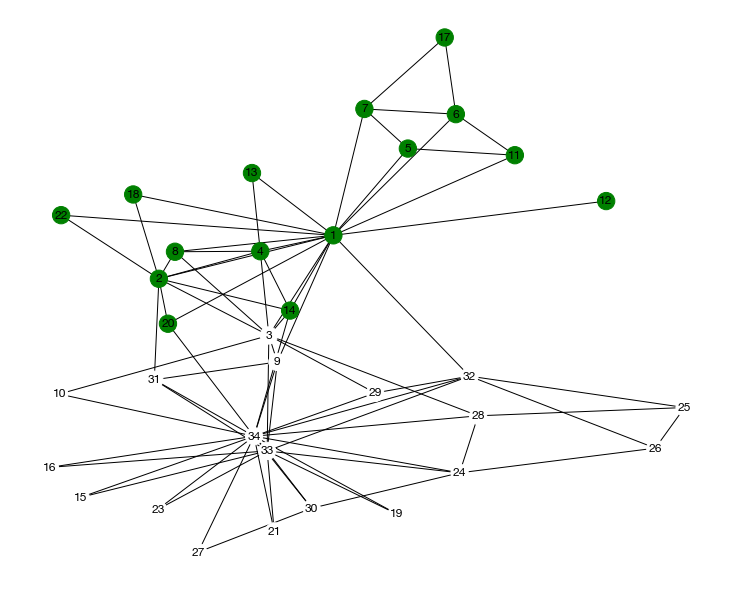

In [18]:
plt.figure(figsize=(10,8))
nx.draw(H, pos, labels=labels_GN, node_color=color_community, cmap=plt.cm.ocean, with_labels=True)